# Berechnung der Erddruckkraft – Schritt für Schritt
**María José Toledo Arcic**

**Version vom 01.04.2025**

Dieses Notebook führt durch die vollständige Berechnung der Erddruckkraft anhand einer Wand mit geneigtem Gelände. Es basiert auf den Werten und Methoden aus dem beigefügten PDF-Dokument. Die Schritte beinhalten Geometrie, grafische Kraftberechnung, analytische Vergleichsmethoden und Visualisierungen.

## Gegebene Werte

**Geometrie und Lasten:**
- Wandhöhe: $h = 6\ \text{m}$
- Wandneigung: $\alpha = -10^\circ$
- Geländeoberfläche: $\beta = 10^\circ$
- Einheitgewicht: $\gamma = 18\ \text{kN/m}^3$
- Kohäsion: $c = 10\ \text{kN/m}^2$
- Zusatzlast: $p = 33\ \text{kN/m}^2$
- Reibungswinkel: $\varphi = 25^\circ$
- Wand-Boden-Reibung: $\delta_a = \frac{2}{3} \cdot \varphi$


In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

from PIL import Image as PILImage
import matplotlib.patches as patches
from urllib.request import urlopen
from PIL import Image as PILImage

In [45]:
# Gegebene Werte definieren
h = 6               # Wandhöhe [m]
alpha = -10         # Wandneigung [°]
beta = 10           # Geländeoberfläche [°]
gamma = 18          # Einheitgewicht [kN/m³]
c = 10              # Kohäsion [kN/m²]
p = 33              # Zusatzlast [kN/m²]
phi = 25            # Reibungswinkel [°]
delta_a = 2 / 3 * phi  # Wand-Boden-Reibung [°]

print(f"delta_a = {delta_a:.2f}°")

delta_a = 16.67°


## Geometrie bei verschiedenen Gleitflächenwinkeln

Für verschiedene Winkel $\vartheta$ der Gleitfläche werden die geometrischen Größen berechnet und grafisch dargestellt. Dabei betrachten wir z. B. die effektive Höhe $h_\Delta$ und Länge $l_\Delta$ entlang der Gleitfläche.

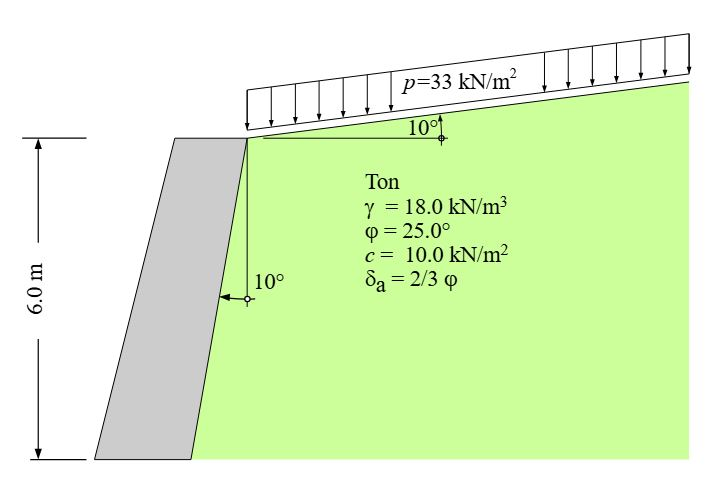

In [46]:
img_url = 'https://raw.githubusercontent.com/MariaJoseTA/Lehre/refs/heads/main/geometrie.JPG'
img = PILImage.open(urlopen(img_url))
display(img)

In [47]:
@interact(
    alpha=widgets.IntSlider(min=-20, max=20, step=1, value=-10, description='α [°]'),
    theta=widgets.IntSlider(min=30, max=70, step=1, value=40, description='ϑ [°]'),
    bg_alpha=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.3, description='Bild α'),
    x_shift=widgets.FloatSlider(min=-5, max=5, step=0.1, value=-3.7, description='x_min'),
    y_shift=widgets.FloatSlider(min=-1, max=2, step=0.1, value=-0.5, description='y_min')
)
def plot_geom(alpha, theta, bg_alpha, x_shift, y_shift):
    h = 6
    alpha_rad = np.radians(alpha)
    theta_rad = np.radians(theta)

    wand_x = [0, h * np.tan(-alpha_rad)]
    wand_y = [0, h]

    gleit_x = [0, h / np.tan(theta_rad)]
    gleit_y = [0, h]

    fig, ax = plt.subplots(figsize=(8, 6))

    try:
        img_url = 'https://raw.githubusercontent.com/MariaJoseTA/Lehre/main/geometrie.JPG'
        img = PILImage.open(urlopen(img_url))
        ax.imshow(img, extent=[x_shift, 10, y_shift, 9], aspect='auto', alpha=bg_alpha)
    except Exception as e:
        print("Bild konnte nicht geladen werden:", e)

    ax.plot(wand_x, wand_y, 'k-', linewidth=3, label='Wand')
    ax.plot(gleit_x, gleit_y, 'r--', linewidth=2, label='Gleitfläche')
    ax.fill_between([0, wand_x[1]], [0, wand_y[1]], color='lightgray', alpha=0.5, label='Boden')

    arc_alpha = patches.Arc((0, 0), 1.5, 1.5, angle=0, theta1=0, theta2=-alpha, color='blue')
    ax.add_patch(arc_alpha)
    ax.text(0.5, 0.1, f'$\\alpha = {alpha}^\\circ$', color='blue')

    arc_theta = patches.Arc((0, 0), 2, 2, angle=0, theta1=0, theta2=theta, color='red')
    ax.add_patch(arc_theta)
    ax.text(1.1, 0.2, f'$\\vartheta = {theta}^\\circ$', color='red')

    ax.set_title('Geometrie: Wand und Gleitfläche mit Hintergrundbild')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('z [m]')
    ax.axis('equal')
    ax.grid(True)
    ax.legend()
    plt.show()

interactive(children=(IntSlider(value=-10, description='α [°]', max=20, min=-20), IntSlider(value=40, descript…

## Berechnung des Erddrucks

Auf Basis der geometrischen Längen und eines angenommenen Flächengewichts erfolgt die Berechnung der Kräfte:
- $E$ wird aus den Gleichungen berechnet.

## Herleitung der Erddruckkräfte

Gegeben sind folgende Winkel (alle in Grad):

- θ: Gleitflächenwinkel  
- φ: Reibungswinkel des Bodens  
- δₐ = 2⁄3 · φ: Wand-Boden-Reibungswinkel  
- α: Wandneigung  
- β = 10°: Geländeoberfläche

### Hilfswinkel:

$$
f = \vartheta - \varphi
$$

$$
a = \vartheta - \alpha
$$

$$
b = \vartheta - \beta
$$

### Geometrischer Ausdruck:

$$
A = \cos(\vartheta - \varphi - \delta_a - \alpha)
$$

---

## 🔧 Berechnung der Erddruckanteile

**Eigengewicht-Anteil:**

$$
E_{ag} = \frac{\gamma \cdot h^2 \cdot \cos(\alpha - \beta) \cdot \sin(f) \cdot \cos(a)}
{2 \cdot \cos^2(\alpha) \cdot A \cdot \sin(b)}
$$

**Zusatzlast-Anteil:**

$$
E_{ap} = \frac{p \cdot h \cdot \cos(\beta) \cdot \sin(f) \cdot \cos(a)}
{\cos(\alpha) \cdot A \cdot \sin(b)}
$$

**Kohäsionswiderstand:**

$$
E_{ac} = \frac{c \cdot h \cdot \cos(\varphi) \cdot \cos(\alpha - \beta)}
{\cos(\alpha) \cdot A \cdot \sin(b)}
$$

---

### 💡 Gesamter Erddruck:

$$
E = E_{ag} + E_{ap} - E_{ac}
$$


In [53]:
@interact(
    theta=widgets.IntSlider(min=30, max=70, step=1, value=40, description='ϑ [°]'),
    phi=widgets.IntSlider(min=10, max=45, step=1, value=25, description='φ [°]'),
    alpha=widgets.IntSlider(min=-20, max=20, step=1, value=-10, description='α [°]'),
    c=widgets.FloatSlider(min=0, max=30, step=1, value=10, description='c [kN/m²]'),
    p=widgets.FloatSlider(min=0, max=50, step=1, value=33, description='p [kN/m²]')
)
def plot_erddruck(theta, phi, alpha, c, p):
    # Gegebene Werte
    h = 6
    gamma = 18
    delta_a = 2/3 * phi

    # Winkel in Radiant
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)
    delta_rad = np.radians(delta_a)
    alpha_rad = np.radians(alpha)
    beta_rad = np.radians(10)

    f = theta_rad - phi_rad
    a = theta_rad - alpha_rad
    b = theta_rad - beta_rad
    A = np.cos(np.radians(theta - phi - delta_a - alpha))

    cos_alpha = np.cos(alpha_rad)
    cos_beta = np.cos(beta_rad)
    cos_phi = np.cos(phi_rad)
    cos_ab = np.cos(alpha_rad - beta_rad)

    cos_a = np.cos(a)
    sin_f = np.sin(f)
    sin_b = np.sin(b)

    # Berechnung der Kräfte
    Eag = (gamma * h * h * cos_ab * sin_f * cos_a) / (2 * cos_alpha**2 * A * sin_b)
    Eap = (p * h * cos_beta * sin_f * cos_a) / (cos_alpha * A * sin_b)
    Eac = (c * h * cos_phi * cos_ab) / (cos_alpha * A * sin_b)
    E_total = Eag + Eap - Eac

    # Plot
    labels = ['Eag (Eigengewicht)', 'Eap (Auflast)', 'Eac (Kohäsion)', 'E gesamt']
    values = [Eag, Eap, Eac, E_total]
    colors = ['blue', 'orange', 'green', 'red']

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color=colors)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval:.1f}', ha='center', va='bottom')

    plt.title('Anteile der Erddruckkraft')
    plt.ylabel('Kraft [kN]')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.ylim(0, max(values) * 1.3)
    plt.show()

interactive(children=(IntSlider(value=40, description='ϑ [°]', max=70, min=30), IntSlider(value=25, descriptio…

## Verlauf der Erddruckkraft $E$ in Abhängigkeit von $\vartheta$

In diesem Schritt wird die resultierende Erddruckkraft $E$ für unterschiedliche Gleitflächenwinkel $\vartheta$ gegenübergestellt. Die Daten entstammen der grafischen Auswertung aus dem PDF.

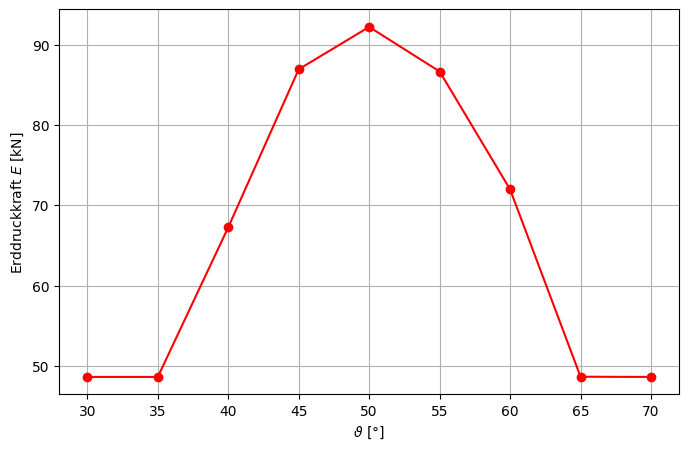

In [49]:
# Bereich für ϑ
theta_values = np.arange(30, 75, 5)
E_values = []

for theta in theta_values:
    # Winkel in Radiant
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)
    delta_rad = np.radians(delta_a)
    alpha_rad = np.radians(alpha)
    beta_rad = np.radians(beta)

    f = theta_rad - phi_rad
    a = theta_rad - alpha_rad
    b = theta_rad - beta_rad
    A = np.cos(np.radians(theta - phi - delta_a - alpha))

    cos_alpha = np.cos(alpha_rad)
    cos_beta = np.cos(beta_rad)
    cos_phi = np.cos(phi_rad)
    cos_ab = np.cos(alpha_rad - beta_rad)
    cos_a = np.cos(a)
    sin_f = np.sin(f)
    sin_b = np.sin(b)

    # Kräfte berechnen
    Eag = (gamma * h * h * cos_ab * sin_f * cos_a) / (2 * cos_alpha**2 * A * sin_b)
    Eap = (p * h * cos_beta * sin_f * cos_a) / (cos_alpha * A * sin_b)
    Eac = (c * h * cos_phi * cos_ab) / (cos_alpha * A * sin_b)
    E_total = Eag + Eap - Eac

    # Mindestwert-Prüfung
    K_min = 0.15
    E_min = 0.5 * gamma * h**2 * K_min
    E_total = max(E_total, E_min)

    E_values.append(E_total)

# Plotten
plt.figure(figsize=(8, 5))
plt.plot(theta_values, E_values, marker='o', linestyle='-', color='red')
plt.xlabel(r'$\vartheta$ [°]')
plt.ylabel('Erddruckkraft $E$ [kN]')
plt.grid(True)
plt.xticks(theta_values)
plt.show()


# Teil II - Vergleich mit analytischer Methode (Erddruckbeiwerte)

In diesem Schritt vergleichen wir die zuvor grafisch bestimmte Erddruckkraft $E$ mit dem analytisch berechneten Wert. Die horizontale Erddruckkraft setzt sich aus mehreren Anteilen zusammen:

$$
E_{agh} = \frac{1}{2} \cdot h \cdot \gamma \cdot K_{agh} \quad \text{(gewichteter Anteil)}
$$

$$
E_{ach} = h \cdot c \cdot K_{ach} \quad \text{(kohäsiver Anteil)}
$$

$$
E_{aph} = h \cdot p \cdot K_{aph} \quad \text{(Zusatztlast)}
$$

$$
E_{ah} = \max(E_{agh} - E_{ach}, \frac{1}{2} h^2 \gamma K_{agh,min}) + E_{aph}
$$

$$
E_{av} = E_{ah} \cdot \tan(\alpha + \delta_a)
$$

$$
E = \sqrt{E_{ah}^2 + E_{av}^2}
$$

Die folgenden Werte werden verwendet:
- $$K_{agh} = 0{,}339$$
- $$K_{ach} = 1{,}255$$
- $$K_{aph} = 0{,}35$$
- $$K_{agh,min} = 0{,}145$$
- $$\alpha = -10^\circ$$
- $$\delta_a = \frac{2}{3} \cdot 25^\circ = 16{,}67^\circ$$

In [50]:
# Parameter definieren
Kagh = 0.339
Kach = 1.255
Kaph = 0.35
Kagh_min = 0.145

alpha_rad = np.radians(alpha)
delta_rad = np.radians(delta_a)

# Einzelkomponenten berechnen
Eagh = 0.5 * h * gamma * Kagh
Each = h * c * Kach
Eaph = h * p * Kaph

# Minimum beachten
Eagh_min = 0.5 * h**2 * gamma * Kagh_min
Eah = max(Eagh - Each, Eagh_min) + Eaph
Eav = Eah * np.tan(alpha_rad + delta_rad)
Ea = np.sqrt(Eah**2 + Eav**2)

print(f"Eagh = {Eagh:.2f} kN")
print(f"Each = {Each:.2f} kN")
print(f"Eaph = {Eaph:.2f} kN")
print(f"→ Eah = {Eah:.2f} kN")
print(f"→ Eav = {Eav:.2f} kN")
print(f"→ Resultierende analytisch berechnete Erddruckkraft Ea = {Ea:.2f} kN")

Eagh = 18.31 kN
Each = 75.30 kN
Eaph = 69.30 kN
→ Eah = 116.28 kN
→ Eav = 13.59 kN
→ Resultierende analytisch berechnete Erddruckkraft Ea = 117.07 kN


In [51]:
def berechne_erddruckkraft(
    h=6, gamma=18, c=10, p=33,
    alpha=-10, beta=10, phi=25,
    delta_a=None,
    Kagh=0.339, Kagh_min=0.145,
    Kach=1.255, Kaph=0.35
):
    if delta_a is None:
        delta_a = 2 / 3 * phi
    alpha_rad = np.radians(alpha)
    delta_rad = np.radians(delta_a)

    eag_hu = h * gamma * Kagh
    each = c * Kach
    eaph = p * Kaph

    Eagh = eag_hu * h / 2
    Each = each * h
    Eah1 = Eagh - Each
    Eah_min = (h ** 2 / 2) * gamma * Kagh_min
    Eah = max(Eah1, Eah_min) + eaph

    Eav = Eah * np.tan(alpha_rad + delta_rad)
    Ea = np.sqrt(Eah ** 2 + Eav ** 2)

    return {
        "Eagh [kN]": Eagh,
        "Each [kN]": Each,
        "Eaph [kN]": eaph * h,
        "Eah [kN]": Eah,
        "Eav [kN]": Eav,
        "Ea [kN]": Ea
    }

In [52]:
@interact(
    phi=widgets.IntSlider(min=10, max=45, step=1, value=25, description='φ [°]'),
    alpha=widgets.IntSlider(min=-20, max=20, step=1, value=-10, description='α [°]'),
    c=widgets.FloatSlider(min=0, max=30, step=1, value=10, description='c [kN/m²]'),
    p=widgets.FloatSlider(min=0, max=50, step=1, value=33, description='p [kN/m²]')
)
def plot_erddruck_interaktiv(phi, alpha, c, p):
    result = berechne_erddruckkraft(phi=phi, alpha=alpha, c=c, p=p)
    labels = list(result.keys())
    values = list(result.values())

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Kraft [kN]")
    plt.title("Erddruckkraft-Komponenten für gewählte Parameter")

    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f"{value:.1f}", ha='center', va='bottom')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

interactive(children=(IntSlider(value=25, description='φ [°]', max=45, min=10), IntSlider(value=-10, descripti…